<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [43]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c34dda1e36bfad2ff84ddaf8a36ac062&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbEdHWE1wMllRSDZYRm15dlVYaU51ZXlCUUFPTmRMUkc1OWptZXBBdmtqR2RNYlVaQ1hkZHYtVi1vUVlCNUItZyIsInN0YXRlIjoiYzM0ZGRhMWUzNmJmYWQyZmY4NGRkYWY4YTM2YWMwNjIifQ==


In [4]:
dir.create('/content/predictor_variables/')

In [5]:
# Hawaii GEDI data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy'), path =  '/content/predictor_variables/Hawaii_GEDI_4A.gpkg', overwrite = FALSE)

File downloaded:

• Hawaii_GEDI.gpkg <id: 1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy>

Saved locally as:

• /content/predictor_variables/Hawaii_GEDI_4A.gpkg



In [6]:
# Hawaii 250m grid
# https://drive.google.com/file/d/1Jowm2XIdJHrt6N3tGhbLZ81UZZVMqAW8/view?usp=drive_link
drive_download(file = as_id('1Jowm2XIdJHrt6N3tGhbLZ81UZZVMqAW8'), path =  '/content/predictor_variables/HI_island_250_m_grid.gpkg', overwrite = FALSE)

File downloaded:

• HI_island_250_m_grid.gpkg <id: 1Jowm2XIdJHrt6N3tGhbLZ81UZZVMqAW8>

Saved locally as:

• /content/predictor_variables/HI_island_250_m_grid.gpkg



In [7]:
folder_loc <- '/content/predictor_variables/TerraClimate/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1bIbwKYmzP2o6VEAWyLIRmeMQbGFDt-vX?usp=drive_link
folder_id <- "1bIbwKYmzP2o6VEAWyLIRmeMQbGFDt-vX"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}


File downloaded:

• Maui_Mean_Climate_1958_to_2023.tif <id: 1Aglg9-srq187HYR38PFBVrodg3PpcqbE>

Saved locally as:

• /content/predictor_variables/TerraClimate/Maui_Mean_Climate_1958_to_2023.tif

File downloaded:

• Lanai_Mean_Climate_1958_to_2023.tif <id: 1eFkEW2ZRWtMK-IMEpVJ28R3xups_HhOT>

Saved locally as:

• /content/predictor_variables/TerraClimate/Lanai_Mean_Climate_1958_to_2023.tif

File downloaded:

• Molokai_Mean_Climate_1958_to_2023.tif <id: 18SNFZ6VefxYbEEtWl1nXDj8JJFLdFDo_>

Saved locally as:

• /content/predictor_variables/TerraClimate/Molokai_Mean_Climate_1958_to_2023.tif

File downloaded:

• Hawaii_Mean_Climate_1958_to_2023.tif <id: 1pMs5OsTwQ1N3kXO9bb3W-qfhxwcJtzIj>

Saved locally as:

• /content/predictor_variables/TerraClimate/Hawaii_Mean_Climate_1958_to_2023.tif

File downloaded:

• Kauai_Mean_Climate_1958_to_2023.tif <id: 14bpiZID-VOQmsEVeQc9gFHe8JYK7w_ew>

Saved locally as:

• /content/predictor_variables/TerraClimate/Kauai_Mean_Climate_1958_to_2023.tif

File downlo

In [8]:
folder_loc <- '/content/predictor_variables/SRTM_mTPI/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1YKJrZXTo-L4UpvJ0iEGo8yIX6uhoQ9AW?usp=drive_link
folder_id <- "1YKJrZXTo-L4UpvJ0iEGo8yIX6uhoQ9AW"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Metadata <id: 1GB4d-4-xOOFHbf6R8z8yw5ZVYe4n-Oz-lSM43dpESb0>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Metadata.docx

File downloaded:

• Molakai_SRTM_mTPI_Buffer.tif <id: 1WRDZse9NGahMQ4h22bxvsv4XFp10JJZW>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Molakai_SRTM_mTPI_Buffer.tif

File downloaded:

• Oahu_SRTM_mTPI_Buffer.tif <id: 1MJEjAuHBeDmvfU_7W4j6RZJk6uLD4TE_>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Oahu_SRTM_mTPI_Buffer.tif

File downloaded:

• Kauai_SRTM_mTPI_Buffer.tif <id: 1APv2WFDHdAiwOhBcAw8db-b1NSIlsK1K>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Kauai_SRTM_mTPI_Buffer.tif

File downloaded:

• Lanai_SRTM_mTPI_Buffer.tif <id: 1sz3x9fZufpjbtrIpY3ZovhNknmDmkR5n>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Lanai_SRTM_mTPI_Buffer.tif

File downloaded:

• Niihau_SRTM_mTPI_Buffer.tif <id: 1JlGaWub7TJ31v7V1GSDQRIq5Mw4wcZx0>

Saved locally as:

• /content/predictor_variables

In [9]:
folder_loc <- '/content/predictor_variables/Elevation/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1XmH9T9xVINZZfPFi39Wus1l7c0SKS4Am?usp=drive_link
folder_id <- "1XmH9T9xVINZZfPFi39Wus1l7c0SKS4Am"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Kauai_elevation.tif <id: 1SNmoJcKsyKSlG5DVye0c1pHvgWEQ5f1r>

Saved locally as:

• /content/predictor_variables/Elevation/Kauai_elevation.tif

File downloaded:

• Oahu_elevation-0000000000-0000046592.tif
  <id: 1yRDrfvLTEGECTDQcwXRIxoHmUu3D9LL4>

Saved locally as:

• /content/predictor_variables/Elevation/Oahu_elevation-0000000000-0000046592.tif

File downloaded:

• Maui_elevation.tif <id: 1Or-pj4QiOj8VgMOAPtVjMm_ocbrvGM6_>

Saved locally as:

• /content/predictor_variables/Elevation/Maui_elevation.tif

File downloaded:

• Molokai_elevation.tif <id: 1ae2lpPQngdFx58mRpqt02Z1bQg-Tifen>

Saved locally as:

• /content/predictor_variables/Elevation/Molokai_elevation.tif

File downloaded:

• Niihau_elevation.tif <id: 1L6lodPtr7u70scb-gu_QliaAIyEwYAtc>

Saved locally as:

• /content/predictor_variables/Elevation/Niihau_elevation.tif

File downloaded:

• Oahu_elevation-0000000000-0000000000.tif
  <id: 1YMV_pXPQjmdam7ucBItWqzFJPPYQK7H5>

Saved locally as:

• /content/predicto

In [10]:
folder_loc <- '/content/predictor_variables/LandForms/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1PkUR4GK50wC6Kgrvyy-d6067ypdX1dkx?usp=drive_link
folder_id <- "1PkUR4GK50wC6Kgrvyy-d6067ypdX1dkx"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Landforms_Buffer_2000m.tif <id: 1HMIkKM_02cVNWaB7-IYwnd414Wg5acnK>

Saved locally as:

• /content/predictor_variables/LandForms/Landforms_Buffer_2000m.tif

File downloaded:

• Kauai_Landforms_Buffer.tif <id: 1oRmeE1kg5GswFcDdUaGU5jnui9Y2DpR3>

Saved locally as:

• /content/predictor_variables/LandForms/Kauai_Landforms_Buffer.tif

File downloaded:

• Oahu_Landforms_Buffer-0000000000-0000065536.tif
  <id: 1PcZoQe0l8WLgSagiWWUpTmWmmHmGnIRx>

Saved locally as:

• /content/predictor_variables/LandForms/Oahu_Landforms_Buffer-0000000000-0000065536.tif

File downloaded:

• Molakai_Landforms_Buffer.tif <id: 1ZBdccF_ELdIApV0SkAv2ZfWsZ0a0ae1f>

Saved locally as:

• /content/predictor_variables/LandForms/Molakai_Landforms_Buffer.tif

File downloaded:

• Niihau_Landforms_Buffer.tif <id: 16jkuVWQ_BIjLBJiTeZeHMj3Z_FCJ4ttm>

Saved locally as:

• /content/predictor_variables/LandForms/Niihau_Landforms_Buffer.tif

File downloaded:

• Hawaii_Landforms_Buffer.tif <id: 1qBNjiXKd-JJ8CICZ

In [11]:
folder_loc <- '/content/predictor_variables/LandSat_composite/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1NzvurSghdEJdX0UsfdyuOcOyh6n3jUDo?usp=drive_link
folder_id <- "1NzvurSghdEJdX0UsfdyuOcOyh6n3jUDo"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Niihau_LS_composite_2012_2018.tif <id: 1yphCVOxcRgBOKdhvOOQunCnObkHhPWWx>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Niihau_LS_composite_2012_2018.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000000000-0000035840.tif
  <id: 1Tyc-6B7SqE1nMRBDbSzNP9KvoItaogpC>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000000000-0000035840.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000026880.tif
  <id: 1yaE46GTtCsjXAhqK43HzMHgfMicRjMnK>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000008960-0000026880.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000035840.tif
  <id: 1sxPsCuwNjHyfO2Sxit0jVfG_jai9IJWR>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000008960-0000035840.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000071680.tif
  <id: 1

In [12]:
folder_loc <- '/content/predictor_variables/DynamicWorld_landcover/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/152pjTArpwlDVGjXFoSU9bmo1BDSKdCqq?usp=drive_link
folder_id <- "152pjTArpwlDVGjXFoSU9bmo1BDSKdCqq"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000200448.tif
  <id: 1d1budUOMeLAnuM2sc0XRwNaGJDVYD6mi>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000200448.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000096512.tif
  <id: 12WZZsotfizLogT8LNfk5xnd8B_SwxmX7>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000096512.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000193024.tif
  <id: 1LYpsLuD3I41nw7dzn2iragALgzqlSDfe>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000193024.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000014848-0000200448.tif
  <id: 1FaGqlWwDEWImhMgu8PRwC_YBoKOGk

In [13]:
  # https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
drive_download(as_id('1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv'), path = paste0('/content/fia.gpkg'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.gpkg')

File downloaded:

• Soils_Joined.gpkg <id: 1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv>

Saved locally as:

• /content/fia.gpkg



Reading layer `Soils_Joined' from data source `/content/fia.gpkg' using driver `GPKG'
Simple feature collection with 750 features and 197 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7567 ymin: 19.02513 xmax: -154.8152 ymax: 22.18564
Geodetic CRS:  WGS 84


In [14]:
dir_list <- list.dirs('/content/predictor_variables')[-1]

names(dir_list) <- list.dirs('/content/predictor_variables',full.names = FALSE)[-1]

In [15]:
names(dir_list) %>% lapply(function(x){
  print(x)
 y <- dir_list[[x]]
 vrt(y %>% lapply(function(x){list.files(y, pattern='*.tif',full.names = T)}) %>%unlist,filename=paste0(y,'/',x,'.vrt'),overwrite=T)
 print(paste('Done',x))
})

[1] "DynamicWorld_landcover"
[1] "Done DynamicWorld_landcover"
[1] "Elevation"
[1] "Done Elevation"
[1] "LandForms"
[1] "Done LandForms"
[1] "LandSat_composite"
[1] "Done LandSat_composite"
[1] "SRTM_mTPI"
[1] "Done SRTM_mTPI"
[1] "TerraClimate"
[1] "Done TerraClimate"


[[1]]
[1] "Done DynamicWorld_landcover"

[[2]]
[1] "Done Elevation"

[[3]]
[1] "Done LandForms"

[[4]]
[1] "Done LandSat_composite"

[[5]]
[1] "Done SRTM_mTPI"

[[6]]
[1] "Done TerraClimate"

In [16]:
 raster_list <- list.files('/content/predictor_variables',pattern = '*.vrt',full.names = T,recursive = T) %>% lapply(stack) %>% lapply(rast)

raster_list
  # # Use gdalbuildvrt to create VRT
  # gdalbuildvrt(destfile = paste0(x,'/',x,'.vrt'),
  #              files =   (x %>% lapply(function(x){list.files(x, pattern='*.tif',full.names = T)})),
  #              separate = FALSE, # Change to TRUE if you want separate bands
  #              overwrite = TRUE)




[[1]]
class       : SpatRaster 
dimensions  : 371833, 2204931, 10  (nrow, ncol, nlyr)
resolution  : 9.031842e-05, 9.031842e-05  (x, y)
extent      : -178.4436, 20.70229, 18.8654, 52.44877  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
source      : DynamicWorld_landcover.vrt 
names       : Dynam~ver_1, Dynam~ver_2, Dynam~ver_3, Dynam~ver_4, Dynam~ver_5, Dynam~ver_6, ... 

[[2]]
class       : SpatRaster 
dimensions  : 35816, 87898, 1  (nrow, ncol, nlyr)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -178.4436, -154.7556, 18.8652, 28.51742  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
source      : Elevation.vrt 
name        : Elevation 

[[3]]
class       : SpatRaster 
dimensions  : 80530, 270460, 1  (nrow, ncol, nlyr)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -178.4437, -105.5562, 18.86543, 40.56783  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
source      : 

In [17]:
gedi_dt <- st_read('/content/predictor_variables/Hawaii_GEDI_4A.gpkg') %>% data.table()

Reading layer `Hawaii_GEDI_2' from data source 
  `/content/predictor_variables/Hawaii_GEDI_4A.gpkg' using driver `GPKG'
Integer64 values larger than 9.0072e+15 lost significance after conversion to double;
use argument int64_as_string = TRUE to import them lossless, as character
Simple feature collection with 4839466 features and 28 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -160.6006 ymin: 18.86556 xmax: -154.7559 ymax: 22.28996
Geodetic CRS:  WGS 84


In [18]:
grid_dt <- st_read('/content/predictor_variables/HI_island_250_m_grid.gpkg') %>% data.table()

Reading layer `grid' from data source 
  `/content/predictor_variables/HI_island_250_m_grid.gpkg' using driver `GPKG'
Simple feature collection with 263630 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 57161.36 ymin: 8702.317 xmax: 572661.4 ymax: 381202.3
Projected CRS: NAD_1983_HARN_StatePlane_Hawaii_1_FIPS_5101


In [19]:
# fia_dt

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 99 rows containing non-finite values (`stat_bin()`).”


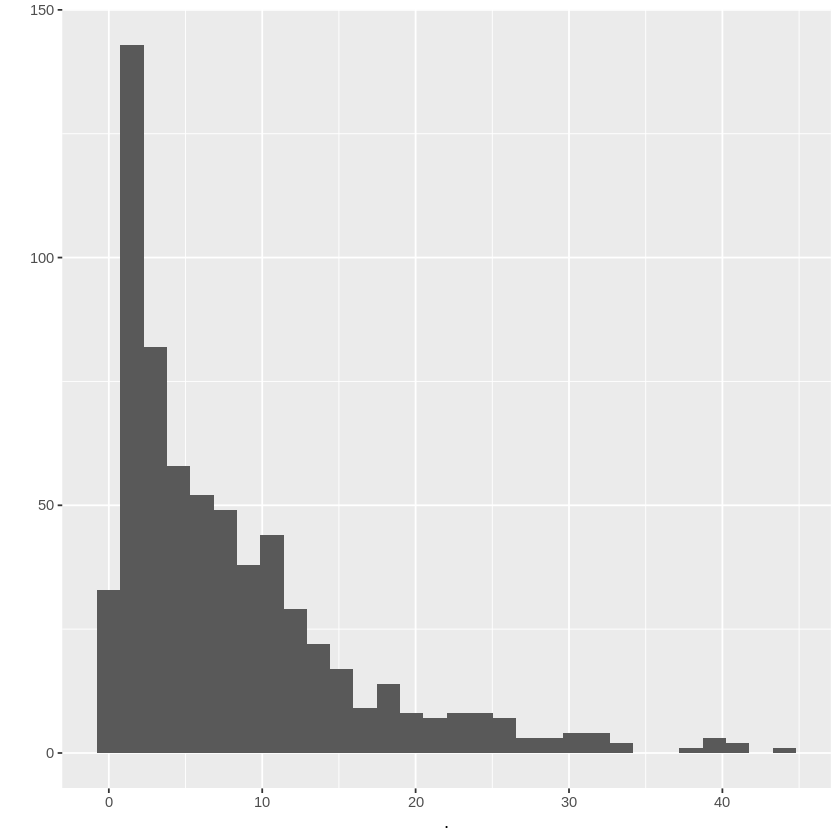

In [20]:
fia_dt[,c('C_TOTAL_PCT','geom')]$C_TOTAL_PCT %>% qplot

In [21]:
grid_int_dt <- fia_dt[,c('PLOT','C_TOTAL_PCT','geom')] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(10000) %>% st_transform(4326) %>% st_intersects(grid_dt %>% st_as_sf %>% st_transform(4326))

In [22]:
  dummy_geom <- fia_dt %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(1000) %>% st_transform(4326)
  fia_dt$dummy_geom <- dummy_geom$geom

  example_poly <- (fia_dt %>%data.table)[,c('PLOT','C_TOTAL_PCT','dummy_geom')]

  ls_dt <- data.table(exact_extract(raster_list[[4]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(ls_dt) <- c("ultra_blue", "blue", "green", "red", "infrared", "sw1", "sw2")

  climate_dt <- data.table(exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(climate_dt) <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")

  elevation_dt <- data.table(exact_extract(raster_list[[2]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(elevation_dt) <- c("elevation")

  rf_dt <- data.table(example_poly,ls_dt,climate_dt,elevation_dt)

Cannot preload entire working area of 1520067948 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 217152564 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”


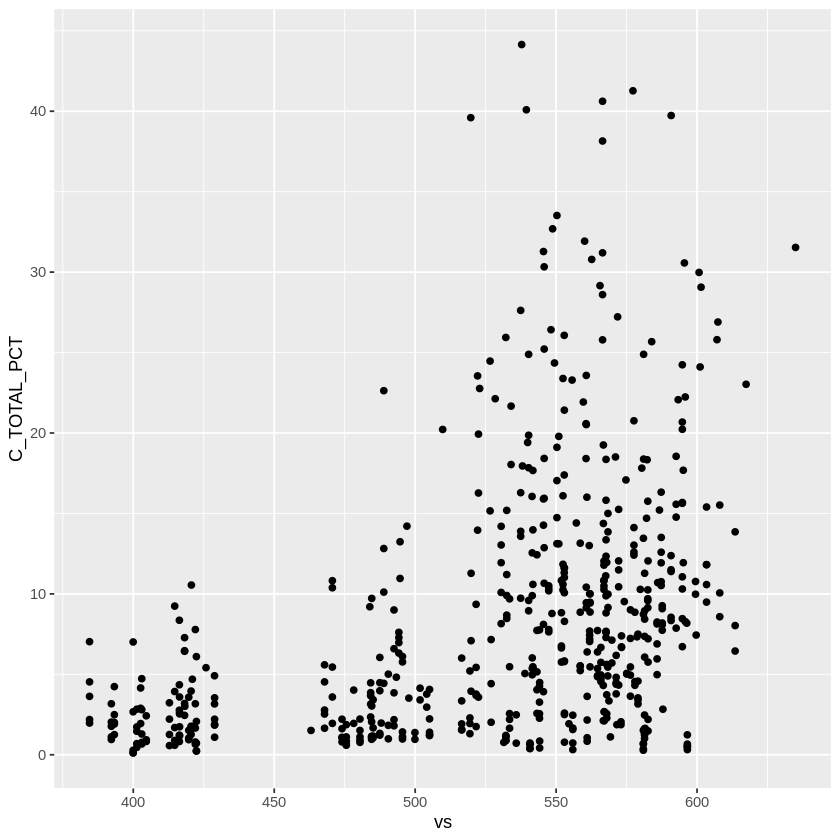

In [28]:
rf_dt %>%
  ggplot(aes(x=vs,y=C_TOTAL_PCT))+
  geom_point()

In [45]:
detectCores()

[1] 8

In [48]:
cl <- makeCluster(detectCores())

In [52]:
sim_dt <-
1:100 %>% lapply(.,function(m,fia_dt,grid_dt,grid_int_dt,raster_list){

  # library(ggplot2)
  library(sf)
  library(magrittr)
  library(data.table)
  library(raster)
  library(exactextractr)
  # library(googledrive)
  # library(DBI)
  library(terra)
  library(randomForest)
  # library(parallel)
  extension <- 1
  fia_extended_dt <- fia_dt

  dummy_geom <- grid_dt[grid_int_dt %>% lapply(function(x){sample(x,extension)}) %>% unlist,] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(250) %>% st_transform(4326)
  fia_extended_dt$dummy_geom <- dummy_geom$geom

  example_poly <- (fia_extended_dt %>%data.table)[,c('PLOT','C_TOTAL_PCT','dummy_geom')]

  cover_dt <- data.table(exact_extract(raster_list[[1]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(cover_dt) <- c("water", "trees", "grass", "flooded_vegetation", "crops", "shrub_and_scrub", "built", "bare", "snow_and_ice",'max')

  elevation_dt <- data.table(exact_extract(raster_list[[2]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(elevation_dt) <- c("elevation")

  landform_dt <- data.table(exact_extract(raster_list[[3]],example_poly %>% st_as_sf,'mode') %>% data.table)
  names(landform_dt) <- c("landform")

  ls_dt <- data.table(exact_extract(raster_list[[4]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(ls_dt) <- c("ultra_blue", "blue", "green", "red", "infrared", "sw1", "sw2")

  tpi_dt <- data.table(exact_extract(raster_list[[5]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(tpi_dt) <- c("SRTM_mTPI")

  climate_dt <- data.table(exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(climate_dt) <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")



  rf_dt <- data.table(example_poly,cover_dt,elevation_dt,landform_dt,tpi_dt,climate_dt)

  # rf_dt %>% head
  x_var <- (rf_dt %>% names)[-c(1,2,3)]

  rf_form <- as.formula(paste0('C_TOTAL_PCT~',paste(x_var,collapse = '+')))

  # print(rf_form)

  rf_dt <- rf_dt[complete.cases(rf_dt[,-3]),]

  rf_terra <- randomForest(rf_form,rf_dt,verbose=T)

  rf_imp_dt <- rf_terra$importance %>% t %>% data.table

  names(rf_imp_dt) <-paste0('var_imp_',names(rf_imp_dt))
  # [,c('PLOT','C_TOTAL_PCT','geom')]
  out_dt <- data.table(rf_dt,data.table(predicted = rf_terra$predicted),rf_imp_dt[rep(1,nrow(rf_dt)),])

  return(out_dt)
  },fia_dt,grid_dt,grid_int_dt,raster_list) %>%
  rbindlist

Cannot preload entire working area of 19184301000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215493478 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215493478 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1508454346 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19074814710 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214254196 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214254196 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1499779372 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19575224320 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219901440 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219883200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1539182400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19744653000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221790186 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221790186 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1552531302 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19459610660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218581364 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218599608 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1530197256 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19510710000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219172400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219160456 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1534123192 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19335041530 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217171704 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217183596 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1520285172 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19352119770 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217390580 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217372210 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1521605470 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19250718120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216231520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216249752 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1513748264 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19284686400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216621295 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216621295 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1516349065 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19406741470 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217994670 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217994670 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1525962690 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19170648400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215345348 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215345348 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1507417436 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19620418940 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220389839 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220408188 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1542857316 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19199541150 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215659780 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215659780 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1509618460 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19260270140 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216354348 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216354348 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1514480436 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19340605120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217243910 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217243910 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1520707370 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19491333000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218956030 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218968115 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1532776805 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19318872420 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217005120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217005120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1519035840 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 18986915090 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 213286476 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 213286476 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1493005332 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19300609450 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216797079 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216797079 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1517579553 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19487889750 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218925648 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218913677 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1532395739 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19330481520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217130478 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217142260 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1519995820 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19283051000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216613012 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216613012 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1516291084 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19373948880 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217613898 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217613898 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1523297286 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19343236530 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217265337 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217265337 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1520857359 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19243185150 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216165270 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216165270 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1513156890 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19412690310 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218071204 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218059296 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1526415072 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19748420340 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221836373 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221848396 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1552938772 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19372080660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217611645 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217599660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1523197620 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19466684270 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218678650 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218678650 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1530750550 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19396320800 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217878456 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217896608 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1525276256 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19671101060 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220962368 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220962368 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1546736576 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19579657720 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219922640 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219934680 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1539542760 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19289570240 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216685944 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216697812 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1516884684 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19677357210 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221034177 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221034177 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1547239239 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19313085960 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216934552 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216946503 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1518625521 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19387931040 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217782702 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217782702 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1524478914 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19159521640 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215232735 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215232735 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1506629145 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19366077720 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217542504 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217542504 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1522797528 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19492569600 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218957496 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218945578 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1532619046 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19100413170 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214552360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214552360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1501866520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19106345880 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214630376 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214630376 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1502412632 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19296787140 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216746175 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216757990 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1517305930 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19430360400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218250625 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218250625 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1527754375 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19332277860 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217148758 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217148758 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1520041306 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19274299360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216505000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216493125 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1515451875 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19112109260 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214685152 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214666946 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1502668622 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19524954960 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219319296 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219319296 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1535235072 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19559821170 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219725233 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219713186 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1537992302 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19535883950 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219437623 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219455820 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1536190740 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19360459530 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217475454 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217463652 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1522245564 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19557326010 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219699480 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219711492 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1537980444 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19271234250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216466440 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216484735 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1515393145 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19443058670 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218406656 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218400615 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1528804305 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19392309900 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217835625 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217817250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1524720750 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19214483780 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215840690 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215822344 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1510756408 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19125337370 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214844736 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214844736 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1503913152 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19347323520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217325022 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217325022 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1521275154 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19873975200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 223234918 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 223234918 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1562644426 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19354878000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217395394 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217395394 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1521767758 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19748424360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221834395 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221828148 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1552797036 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19556794950 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219675250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219687287 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1537811009 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19516471830 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219212761 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219224772 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1534573404 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19111820400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214686119 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214686119 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1502802833 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19360899800 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217478592 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217466640 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1522266480 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19747283490 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221815506 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221815506 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1552708542 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19639490400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220603158 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220603158 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1544222106 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19087307560 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214397666 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214397666 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1500783662 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19404113820 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217985708 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217955508 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1525688556 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19233914980 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216060131 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216060131 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1512420917 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19290768710 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216683166 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216683166 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1516782162 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19222295660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215916120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215916120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1511412840 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19418795270 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218129619 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218111318 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1526779226 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19175046720 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215398302 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215398302 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1507788114 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19387250480 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217770813 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217770813 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1524395691 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19266758640 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216410714 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216410714 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1514874998 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19457922560 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218568843 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218580786 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1530065502 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19492227290 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218933754 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218945753 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1532620271 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19814923750 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 222575088 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 222562981 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1557940867 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19521147360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219293224 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219274916 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1534924412 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19018660570 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 213635322 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 213635322 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1495447254 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19550326800 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219592896 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219592896 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1537150272 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19220391440 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215890536 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215902305 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1511316135 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19206629960 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215722848 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215722848 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1510059936 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19120521680 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214781308 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214793082 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1503551574 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19372851060 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217620042 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217626360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1523384520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19677006340 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221040528 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221022236 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1547155652 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19380495300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217693533 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217693533 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1523854731 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19221639800 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215927028 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215908794 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1511361558 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19269965520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216452655 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216434310 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1515040170 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19147100000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215069550 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215087885 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1505615195 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19134583670 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214926385 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214926385 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1504484695 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19336608400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217199264 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217199264 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1520394848 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19313310000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216953020 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216953020 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1518671140 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19554280900 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219651176 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219651176 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1537558232 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19528294560 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219358755 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219358755 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1535511285 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19525455810 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219327040 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219327040 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1535289280 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19300786730 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216795106 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216806993 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1517648951 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19251549660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216263013 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216244746 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1513713222 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19323617400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217049860 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217049860 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1519349020 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [ ]:
stopCluster(cl)

In [53]:
# Write to GeoPackage
sim_dt %>% st_write("/content/sim_results_6.gpkg", append=FALSE)

Writing layer `sim_results_6' to data source 
  `/content/sim_results_6.gpkg' using driver `GPKG'
Writing 57262 features with 57 fields and geometry type Polygon.


In [54]:
# https://drive.google.com/drive/folders/1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM?usp=drive_link
drive_upload("/content/sim_results_6.gpkg", path = as_id("1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM"))

Auto-refreshing stale OAuth token.

Local file:

• /content/sim_results_6.gpkg

Uploaded into Drive file:

• sim_results_6.gpkg <id: 1YeV1GIXyp6EAFjY8wUOBbFzs9gUT9RWU>

With MIME type:

• application/geopackage+sqlite3



In [ ]:
# sim_dt

In [ ]:
sim_dt %>%
  ggplot(aes(y=C_TOTAL_PCT,x=predicted))+
    geom_point()

In [ ]:
# Load the necessary library
library(repr)

# Adjust width and height of plots
options(repr.plot.width=20, repr.plot.height=8)

In [ ]:
# for(i in 1:10){

sim_dt[,residual := predicted-C_TOTAL_PCT]

sim_dt[,residual_per := residual/C_TOTAL_PCT]

samp_dt <- sim_dt[residual_per>-.05 &residual_per <.05]
plot <- sample(samp_dt$PLOT,1)
# print(plot)
(samp_dt[PLOT==plot] %>% melt(id.vars = c("PLOT","C_TOTAL_PCT","dummy_geom","predicted",'residual','residual_per')) %>%
  ggplot(aes(x=variable,y=value))+
  geom_boxplot() )%>% plot
# }

In [ ]:
dummy_geom <- grid_dt[grid_int_dt %>% lapply(function(x){sample(x,1)}) %>% unlist,] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(2500) %>% st_transform(4326)

In [ ]:
fia_dt$dummy_geom <- dummy_geom$geom

In [ ]:
example_poly <- (fia_dt %>%data.table)[,c('C_TOTAL_PCT','dummy_geom')]

In [ ]:
rf_dt <- data.table(example_poly,exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)

In [ ]:
# rf_dt

In [ ]:
names(rf_dt)[-c(1,2)] <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")


In [ ]:
rf_form <- as.formula(paste0('C_TOTAL_PCT~',paste((rf_dt %>% names)[-c(1,2)],collapse = '+')))
rf_form

In [ ]:
rf_terra <- randomForest(rf_form,rf_dt[complete.cases(rf_dt[,-2]),],verbose=T)
rf_terra %>% varImpPlot
rf_terra

In [ ]:
data.frame(field = rf_terra$y,predicted = rf_terra$predicted) %>%
  ggplot(aes(x=predicted,y=field))+
  geom_point()